In [46]:
# The '%matplotlib notebook' is a magic command in IPython.
# This command sets the Matplotlib backend to display figures in interactive notebooks.
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns
# Import 'FuncAnimation' from the 'matplotlib.animation' module.
# 'FuncAnimation' is a class that makes an animation by repeatedly calling a function.
from matplotlib.animation import FuncAnimation

# Import 'partial' from the 'functools' module.
# 'partial' is a function that allows you to fix a certain number of arguments of a function and returns a new function.
from functools import partial

# Import 'PillowWriter' and 'FFMpegFileWriter' from the 'matplotlib.animation' module.
# 'PillowWriter' is a class that creates an animated GIF using Pillow.
# 'FFMpegFileWriter' is a class that creates an animated video using ffmpeg.
from matplotlib.animation import PillowWriter,FFMpegFileWriter

In [47]:
path = r"G:\AI学习资料\MachineLearningExercise\machine-learning-ex7\ex7\ex7data2.mat"
raw_data = loadmat(path)

### plot raw data

<IPython.core.display.Javascript object>


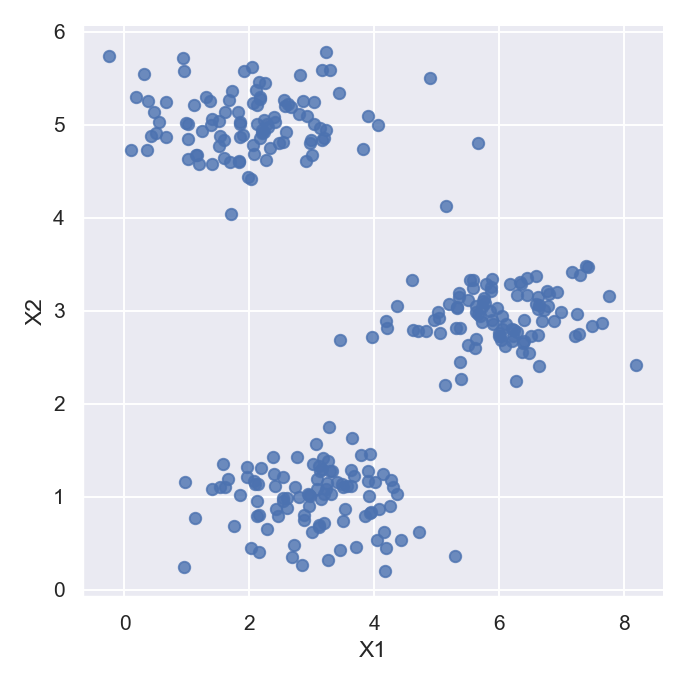

In [48]:
df = pd.DataFrame(raw_data.get("X"),columns=("X1", "X2"))
sns.set(context="notebook",)
sns.lmplot(x='X1', y='X2', data=df, fit_reg=False)

### K-means Clustering

In [49]:
X = raw_data.get('X')
df = pd.DataFrame(X,columns=('x1', 'x2'))
df.head()

,x1,x2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [50]:
# Define a function 'kMeansInitCentroids' to initialize the centroids for the k-means algorithm.
# 'k' is the number of clusters.
# 'X' is the data matrix, where each row is a data point.
def kMeansInitCentroids(k,X):
    # If 'k' is greater than the number of data points, raise a ValueError.
    if k > X.shape[0]:
        raise ValueError(f'k must less than {X.shape[0]}')
    # Create a default random number generator 'rng'.
    rng = np.random.default_rng()
    # Randomly select 'k' data points from 'X' without replacement to be the initial centroids.
    # 'size' specifies the number of data points to select.
    # 'axis' specifies the axis along which to select data points.
    # 'replace' specifies whether sampling is done with replacement.
    sample = rng.choice(X, size=k,axis=0,replace=False)
    # Return the initial centroids.
    return sample

In [ ]:
# Define a function 'findClosestCentroids' to find the closest centroid for each data point.
# 'K' is the matrix of centroids, where each row is a centroid.
# 'X' is the data matrix, where each row is a data point.
def findClosestCentroids(K, X):
    # Repeat each data point in 'X' three times along the row axis to create 'X_ex'.
    # 'repeats' specifies the number of repetitions for each element.
    # 'axis' specifies the axis along which to repeat.
    X_ex = np.repeat(X,repeats=3,axis=0)
    # Tile 'K' along the row axis to match the shape of 'X_ex' to create 'K_ex'.
    # The tuple '(X.shape[0], 1)' specifies the number of repetitions of 'K' along each axis.
    K_ex = np.tile(K,(X.shape[0], 1))
    # Compute the Euclidean distance squared between each data point and each centroid.
    # Then find the index of the closest centroid for each data point.
    # The '+1' is to adjust the indices to be 1-based instead of 0-based.
    c_index = np.sum((X_ex - K_ex)**2,axis=1).reshape(-1,3).argmin(axis=1) + 1
    # Return the indices of the closest centroids.
    return c_index

In [52]:
# Define a function 'computeCentroids' to compute the new centroids.
# 'k' is the number of clusters.
# 'cet' is the matrix of current centroids, where each row is a centroid.
# 'c_i' is the array of indices of the closest centroids for each data point.
# 'X' is the data matrix, where each row is a data point.
def computeCentroids(k, cet, c_i, X):
    # For each cluster, compute the new centroid.
    for i in range(1, k+1):
        # If there are data points assigned to the cluster, compute the mean of these data points to be the new centroid.
        # 'axis' specifies the axis along which to compute the mean.
        if i in c_i:
            cet[i-1] = np.mean(X[c_i==i], axis=0)
        # If there are no data points assigned to the cluster, randomly select a data point from 'X' to be the new centroid.
        # 'size' specifies the number of data points to select.
        # 'axis' specifies the axis along which to select data points.
        else:
            rng = np.random.default_rng()
            cet[i-1] = rng.choice(X,size=1,axis=0)
    # Return the new centroids.
    return cet

#### Animation k-means

<IPython.core.display.Javascript object>


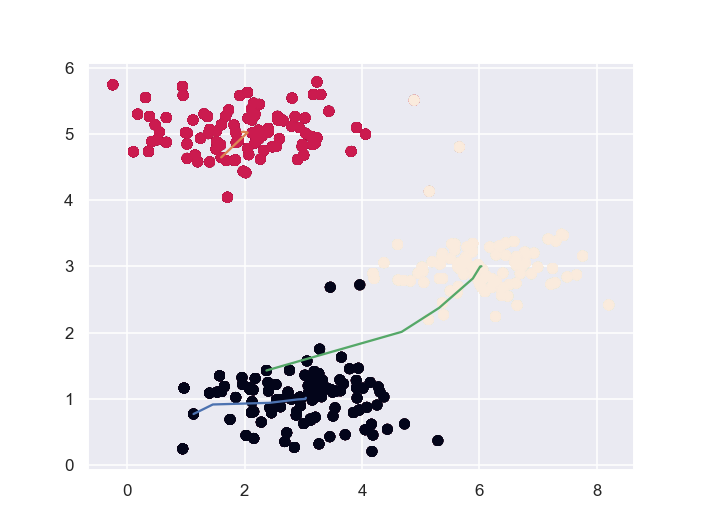

In [66]:
# Create a new figure with a single subplot.
# 'dpi' specifies the resolution of the figure in dots per inch.
fig, ax = plt.subplots(1, 1, dpi=80)

# Set the number of clusters 'k' and the number of iterations 'iters'.
k = 3
iters = 10
# Initialize the centroids 'init_cet' using the 'kMeansInitCentroids' function.
# 'kMeansInitCentroids' is a function that initializes the centroids for k-means clustering.
init_cet = kMeansInitCentroids(k, X)
# Create empty plots for the centroids.
plot_c1, = ax.plot([], [])
plot_c2, = ax.plot([], [])
plot_c3, = ax.plot([], [])

# Define a function 'gene_cu' to generate the centroids and cluster assignments for each iteration.
# 'iters' is the number of iterations for k-means clustering.
# 'K' is the initial centroids.
# 'X' is the data matrix, where each row is a data point.
def gene_cu(iters, K, X):
    # Initialize the current centroids 'con_cet' and the new centroids 'new_cet'.
    con_cet, new_cet = K.copy(), K.copy()
    # Initialize the cluster assignments 'con_ci'.
    con_ci = np.empty(X.shape[0])
    # For each iteration, update the cluster assignments and the centroids.
    for i in range(iters):
        cet_i = findClosestCentroids(new_cet, X)
        new_cet = computeCentroids(k, K, cet_i, X)
        con_cet = np.hstack((con_cet, new_cet))
        con_ci = np.vstack((con_ci, cet_i))
    # Return the cluster assignments and the centroids.
    return con_ci, con_cet

# Define a function 'anima' to animate the k-means clustering process.
# 'iters' is the current iteration.
# 'con_ci' is the cluster assignments for each iteration.
# 'con_cet' is the centroids for each iteration.
def anima(iters, con_ci, con_cet):
    # Plot the data points with colors indicating their cluster assignments.
    smp_sca = ax.scatter(X[:, 0], X[:, 1], c=con_ci[iters])
    # Plot the centroids.
    c1, c2, c3 = [c.reshape(-1, 2) for c in con_cet]
    plot_c1.set_data(c1[:iters, 0], c1[:iters, 1])
    plot_c2.set_data(c2[:iters, 0], c2[:iters, 1])
    plot_c3.set_data(c3[:iters, 0], c3[:iters, 1])
    # Return the plots.
    return smp_sca, plot_c1, plot_c2, plot_c3

# Generate the centroids and cluster assignments for each iteration.
con_ci, con_cet = gene_cu(iters, init_cet, X)
# Create a partial function 'p_anima' with fixed arguments 'con_ci' and 'con_cet'.
# 'partial' is a function in the 'functools' module that fixes a certain number of arguments of a function and returns a new function.
p_anima = partial(anima, con_ci=con_ci, con_cet=con_cet)
# Create an animation 'ani' of the k-means clustering process.
# 'FuncAnimation' is a function in the 'matplotlib.animation' module that makes an animation by repeatedly calling a function 'p_anima'.
ani = FuncAnimation(fig, p_anima, frames=iters, interval=300, blit=True)
# Display the figure.
plt.show()

In [58]:
# Import the 'KMeans' class from the 'sklearn.cluster' module.
# 'KMeans' is a class that implements the k-means clustering algorithm. just use it🐱‍🏍
from sklearn.cluster import KMeans

In [ ]:
# Create an instance 'sk_means' of the 'KMeans' class with 'n_clusters' set to 3.
# 'n_clusters' is the number of clusters to form and the number of centroids to generate.
sk_means = KMeans(n_clusters=3)

# Fit the k-means clustering model to the data 'X'.
# 'X' is the input data, a 2D array-like structure where each row is a data point.
sk_means.fit(X)

# Predict the closest cluster each sample in 'X' belongs to and store the result in 'sk_c'.
# 'sk_c' is a 1D array of cluster indices for each data point in 'X'.
sk_c = sk_means.predict(X) # Returns the cluster index each sample belongs to

# Create a scatter plot of the data points in 'X', colored by their cluster assignments 'sk_c'.
# 'X[:,0]' and 'X[:,1]' are the x and y coordinates of the data points, respectively.
# 'c' specifies the colors of the data points.
ax.scatter(X[:,0], X[:,1], c=sk_c)

# Display the plot.
plt.show()